# Re-produce economic model fig

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['axes.facecolor'] = 'white'

# 自定义配色
nature_colors = {
    'NS': "#c83c1c",
    'Nature': "#29303c",
    'NCC': "#0889a6",
    'NC': "#f1801f",
    'NG': "#006c43",
    'NHB': "#1951A0",
    'NEE': "#C7D530"
}

## 边际收益函数

In [2]:
def du(x):
    return 1/(x+1)

def future_benefit(x1, Q, x, N):
    return du(Q*x/(x+(N-1)*x1)) * Q * (N-1) * x1 / ((x+(N-1)*x1) * (x + (N-1)*x1))

## 参数

In [3]:
beta = 0.7
N = 8
C = 0.5
x1 = 15
Q = 8
T = 5  # Fig. 1B 才用

## Fig. 1

In [4]:
# 使用图片的比例来定位
def get_position_by_ratio(ax, x_ratio, y_ratio):
    """
    使用图片的比例来返回定位，从而更好的控制说明文字的位置
    ax: 一个 matplotlib 的画图轴对象
    x_ratio: 横坐标的比例位置
    y_ratio: 纵坐标的比例位置
    """
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    x = (x_max-x_min) * x_ratio + x_min
    y = (y_max-y_min) * y_ratio + y_min
    return x, y

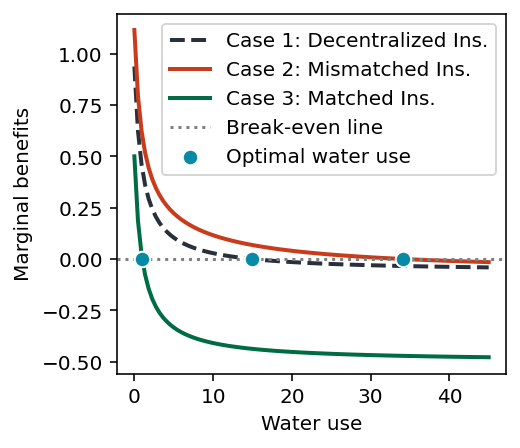

In [7]:
### Fig. 1A

x = np.linspace(0, 45, 100)
f1 = du(x) - C
f2 = du(x) - C / N
f3 = du(x) - C/N + beta/(1-beta) * future_benefit(x1, Q, x, N)
abs_f3 = abs(f3)
xplot3 = x[abs_f3 == min(abs_f3)][0]

fig, ax1 = plt.subplots(figsize=(3.5, 3), constrained_layout=True)

lw = 2
ax1.plot(x, f2, color=nature_colors['Nature'], lw=lw, ls="--", label='Case 1: Decentralized Ins.', zorder=1)
ax1.plot(x, f3, color=nature_colors['NS'], lw=lw, label='Case 2: Mismatched Ins.', zorder=1)
ax1.plot(x, f1, color=nature_colors['NG'], lw=lw, label='Case 3: Matched Ins.', zorder=1)
ax1.axhline(0, ls=':', color='gray', label='Break-even line')

ax1.scatter([1, 15, xplot3], [0, 0, 0], marker="o", label='Optimal water use', edgecolor='white', s=60, alpha=1, color=nature_colors['NCC'], zorder=2)

ax1.legend()
ax1.set_xlabel("Water use")
ax1.set_ylabel("Marginal benefits")
plt.savefig("../figs/outputs/economic_model.pdf", format='pdf')
plt.show();

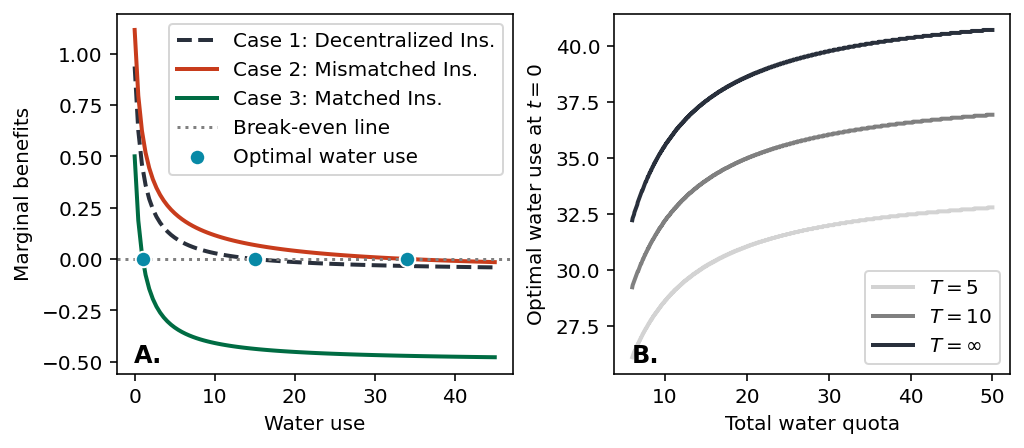

In [6]:
### Fig. 1A

x = np.linspace(0, 45, 100)
f1 = du(x) - C
f2 = du(x) - C / N
f3 = du(x) - C/N + beta/(1-beta) * future_benefit(x1, Q, x, N)
abs_f3 = abs(f3)
xplot3 = x[abs_f3 == min(abs_f3)][0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3), constrained_layout=True)

lw = 2
ax1.plot(x, f2, color=nature_colors['Nature'], lw=lw, ls="--", label='Case 1: Decentralized Ins.', zorder=1)
ax1.plot(x, f3, color=nature_colors['NS'], lw=lw, label='Case 2: Mismatched Ins.', zorder=1)
ax1.plot(x, f1, color=nature_colors['NG'], lw=lw, label='Case 3: Matched Ins.', zorder=1)
ax1.axhline(0, ls=':', color='gray', label='Break-even line')

ax1.scatter([1, 15, xplot3], [0, 0, 0], marker="o", label='Optimal water use', edgecolor='white', s=60, alpha=1, color=nature_colors['NCC'], zorder=2)

ax1.legend()
ax1.set_xlabel("Water use")
ax1.set_ylabel("Marginal benefits")


### Fig. 1B

x = np.linspace(6, 50, 1000)
y1 = du(x) - C
y2 = du(x) - C/N


def find_min_y3(x, q, T):
    if T is np.inf:
        y3 = du(x) - C/N + beta/(1-beta) * future_benefit(x1, q, x, N)
    else:
        y3 = du(x) - C/N + beta/(1-beta) * (1-beta**T) * future_benefit(x1, q, x, N)
    absy3 = abs(y3)
    y3_min = min(absy3)
    result = x[absy3 == y3_min][0]
    return result


def min_f3_arr(t):
    min_f3 = []
    for q in x:
        min_f3.append(find_min_y3(x, q, t))

    x3_min_plot = np.array(min_f3)
    return x3_min_plot


ax2.plot(x, min_f3_arr(3), color='lightgray', lw=lw, label="$T = 5$")
ax2.plot(x, min_f3_arr(5), color='gray', lw=lw, label="$T = 10$")
ax2.plot(x, min_f3_arr(np.inf), color=nature_colors['Nature'], lw=lw, label="$T = \infty$")
ax2.set_xlabel("Total water quota")
ax2.set_ylabel("Optimal water use at $t=0$")
ax2.legend()

a, b = get_position_by_ratio(ax1, 0.08, 0.05)
c, d = get_position_by_ratio(ax2, 0.08, 0.05)
ax1.text(a, b, 'A.', ha='center', va='center', weight='bold', size='large')
ax2.text(c, d, 'B.', ha='center', va='center', weight='bold', size='large')

# plt.savefig("../figs/economic_simulations.jpg", dpi=300)
plt.show();